In [2]:
install.packages("tree")
library(tree)

Installing package into 'C:/Users/felip/OneDrive/Documentos/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\felip\AppData\Local\Temp\RtmpaMiO9i\downloaded_packages


In [3]:
data <- read.table("heart_disease_dataset.csv", header=TRUE, sep=",")

In [4]:
xtabs(~ num, data = data)

num
  0   1 
164 139 

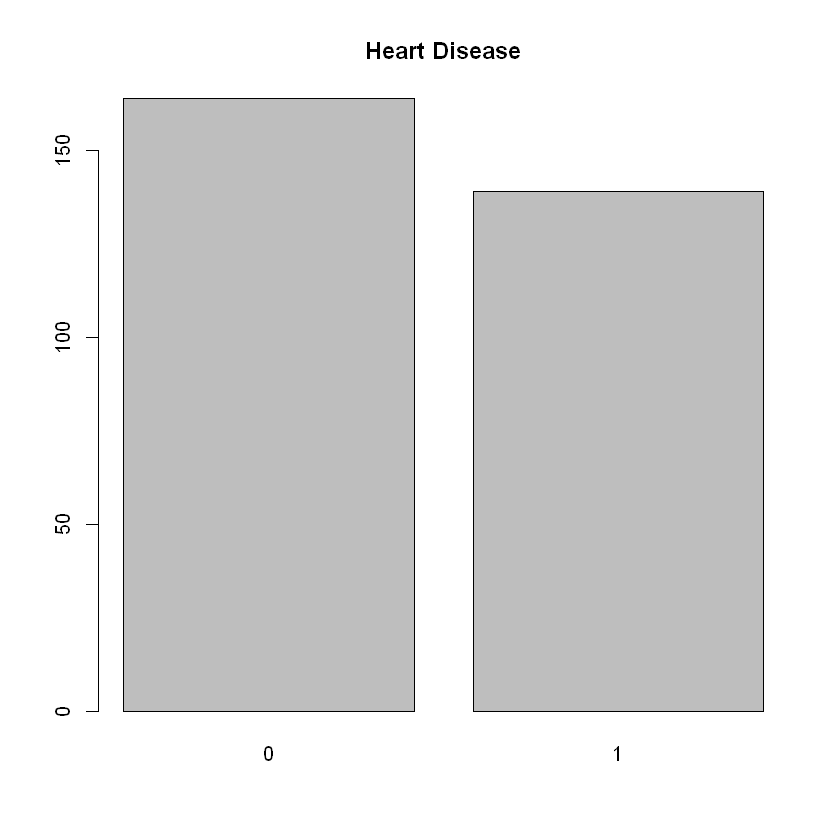

In [5]:
counts <- table(data$num)
barplot(counts, main="Heart Disease")

In [6]:
# Queremos obtener siempre lo mismo
set.seed(42)
# En este caso utilizaremos un conjunto de entrenamiento del 80% de los datos
train_size <- floor(0.80 * nrow(data))
train_mask <- sample(seq_len(nrow(data)),size = train_size)
# Separamos nuestros conjuntos
train <- data[train_mask, ]
test <- data[-train_mask, ]

In [7]:
nrow(train)
nrow(test)

[1] 242

[1] 61

In [8]:
data$num = as.factor(data$num)
train$num = as.factor(train$num)

In [9]:
arbol = tree(num ~ age + sex + cp + trestbps +
            chol + fbs + restecg + thalach + exang +
            oldpeak + slope + ca + thal, data = train)

In [10]:
summary(arbol)


Classification tree:
tree(formula = num ~ age + sex + cp + trestbps + chol + fbs + 
    restecg + thalach + exang + oldpeak + slope + ca + thal, 
    data = train)
Variables actually used in tree construction:
[1] "thal"     "cp"       "age"      "sex"      "oldpeak"  "trestbps" "ca"      
[8] "chol"     "thalach" 
Number of terminal nodes:  18 
Residual mean deviance:  0.485 = 108.6 / 224 
Misclassification error rate: 0.1322 = 32 / 242 

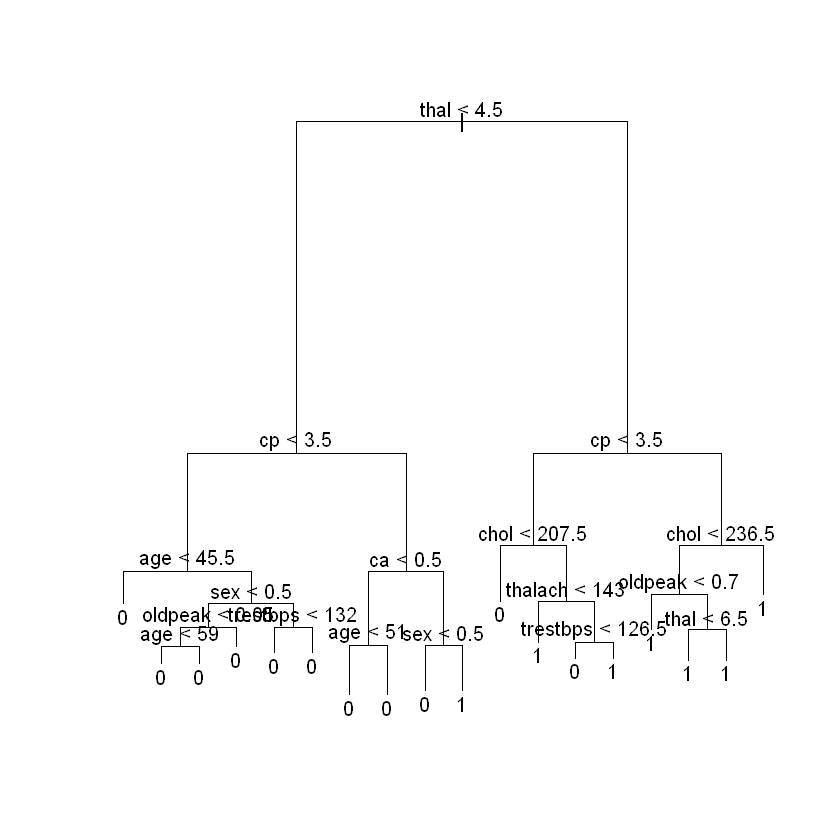

In [11]:
plot(arbol)
text(arbol,pretty = 1)

In [12]:
data$sex = as.factor(data$sex)
data$cp = as.factor(data$cp)
data$fbs = as.factor(data$fbs)
data$restecg = as.factor(data$restecg)
data$exang = as.factor(data$exang)
data$slope = as.factor(data$slope)
data$ca = as.factor(data$ca)
data$thal = as.factor(data$thal)


Classification tree:
tree(formula = num ~ age + sex + cp + trestbps + chol + fbs + 
    restecg + thalach + exang + oldpeak + slope + ca + thal, 
    data = train)
Variables actually used in tree construction:
[1] "thal"     "cp"       "chol"     "age"      "ca"       "exang"    "trestbps"
[8] "thalach"  "oldpeak" 
Number of terminal nodes:  21 
Residual mean deviance:  0.4233 = 93.54 / 221 
Misclassification error rate: 0.09504 = 23 / 242 

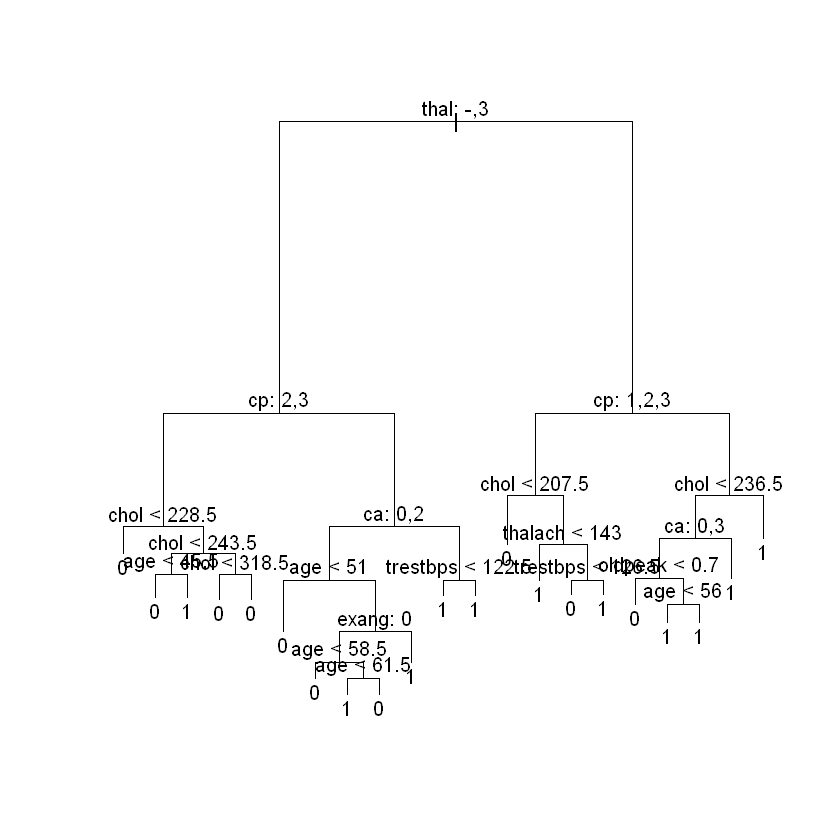

In [13]:
# Queremos obtener siempre lo mismo
set.seed(42)
# En este caso utilizaremos un conjunto de entrenamiento del 80% de los datos
train_size <- floor(0.80 * nrow(data))
train_mask <- sample(seq_len(nrow(data)),size = train_size)
# Separamos nuestros conjuntos
train <- data[train_mask, ]
test <- data[-train_mask, ]

arbol = tree(num ~ age + sex + cp + trestbps +
            chol + fbs + restecg + thalach + exang +
            oldpeak + slope + ca + thal, data = train)

summary(arbol)
plot(arbol)
text(arbol,pretty = 1)

In [14]:
arbol

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 242 335.200 0 ( 0.51653 0.48347 )  
    2) thal: -100000,3 134 149.600 0 ( 0.75373 0.24627 )  
      4) cp: 2,3 76  41.980 0 ( 0.92105 0.07895 )  
        8) chol < 228.5 31   0.000 0 ( 1.00000 0.00000 ) *
        9) chol > 228.5 45  35.340 0 ( 0.86667 0.13333 )  
         18) chol < 243.5 12  15.280 0 ( 0.66667 0.33333 )  
           36) age < 45.5 5   0.000 0 ( 1.00000 0.00000 ) *
           37) age > 45.5 7   9.561 1 ( 0.42857 0.57143 ) *
         19) chol > 243.5 33  15.090 0 ( 0.93939 0.06061 )  
           38) chol < 318.5 25   0.000 0 ( 1.00000 0.00000 ) *
           39) chol > 318.5 8   8.997 0 ( 0.75000 0.25000 ) *
      5) cp: 1,4 58  80.130 0 ( 0.53448 0.46552 )  
       10) ca: 0,2 41  51.220 0 ( 0.68293 0.31707 )  
         20) age < 51 13   0.000 0 ( 1.00000 0.00000 ) *
         21) age > 51 28  38.670 0 ( 0.53571 0.46429 )  
           42) exang: 0 18  21.270 0 ( 0.72222 0.27778 )  
       

In [15]:
arbol$frame

,var,n,dev,yval,splits,yprob
,<fct>,<dbl>,<dbl>,<fct>,"<chr[,2]>","<dbl[,2]>"
1,thal,242,335.218724,0,":ab , :cd","0.51652893, 0.48347107"
2,cp,134,149.597223,0,":bc , :ad","0.75373134, 0.24626866"
4,chol,76,41.981020,0,"<228.5, >228.5","0.92105263, 0.07894737"
8,<leaf>,31,0.000000,0,",","1.00000000, 0.00000000"
9,chol,45,35.340702,0,"<243.5, >243.5","0.86666667, 0.13333333"
18,age,12,15.276340,0,"<45.5 , >45.5","0.66666667, 0.33333333"
36,<leaf>,5,0.000000,0,",","1.00000000, 0.00000000"
37,<leaf>,7,9.560713,1,",","0.42857143, 0.57142857"
19,chol,33,15.089704,0,"<318.5, >318.5","0.93939394, 0.06060606"


In [16]:
#Predecimos los valores
pred = predict(arbol,test,type="class")
#Matriz de confusión
conf_matrix <- with(test,table(pred,test$num))
conf_matrix

    
pred  0  1
   0 32  6
   1  7 16

In [17]:
acc <- sum(diag(conf_matrix))/nrow(test)
acc
miss_class <- 1 - acc
miss_class

[1] 0.7868852

[1] 0.2131148